In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

The data here are collected from experiment by running the pipeline that test each model. Here we select a model called JL transform with the parameter ep: 0.05 and de: 0.05. We will try to predict the running time in seconds for the model given different input size. From manual analysis of the algorithm, we expect the running time O(max(nd, nk)), where d is the original dimension, and k is the reduced dimension. However, we do not know the constant hiding in the Big-O. Here, we will use Polynomial regression with degree 2 (guess educately from the running time analysis) to fit the model to predict the actual running time.

In [40]:
path = "../output/kmeans/1000_0_(-1000, 1000)_special"
path

'../output/kmeans/1000_0_(-1000, 1000)_special'

In [41]:
first_df = pd.read_csv(path)
first_df

,name,run_num,params,reduction_time,train_time,accuracy,original_std_sum,original_std_mean,original_std_median,original_std_max,...,original_sparsity,original_shape,transformed_std_sum,transformed_std_mean,transformed_std_median,transformed_std_max,transformed_std_min,transformed_sparsity,transformed_shape,characteristics
0,JL transform,0,"{'ep': 0.05, 'de': 0.05}",0.011093,0.213273,0.96,1.155737e+06,1155.737355,1155.145962,1231.675122,...,0.0,"(1000, 1000)",4.033584e+06,3633.859065,3633.896458,4663.024997,1685.666512,0.0,"(1110, 100)","{'n': 1000, 'd': 1000, 'a': -1000, 'b': 1000, ..."
1,JL transform,0,"{'ep': 0.05, 'de': 0.05}",0.056904,0.236528,1.00,1.154810e+06,1154.810060,1155.028970,1201.611926,...,0.0,"(1000, 3000)",4.014566e+06,3616.726534,3626.055974,4086.252370,1682.973821,0.0,"(1110, 300)","{'n': 1000, 'd': 3000, 'a': -1000, 'b': 1000, ..."
2,JL transform,0,"{'ep': 0.05, 'de': 0.05}",0.137499,0.249894,0.99,1.154777e+06,1154.777373,1154.825886,1188.001764,...,0.0,"(1000, 5000)",4.020393e+06,3621.975683,3637.587000,4031.718399,1705.189251,0.0,"(1110, 500)","{'n': 1000, 'd': 5000, 'a': -1000, 'b': 1000, ..."
3,JL transform,0,"{'ep': 0.05, 'de': 0.05}",0.360814,0.312562,1.00,1.154322e+06,1154.321653,1154.445943,1185.216767,...,0.0,"(1000, 7000)",4.026993e+06,3627.921638,3647.701259,3981.022133,1728.038036,0.0,"(1110, 700)","{'n': 1000, 'd': 7000, 'a': -1000, 'b': 1000, ..."
4,JL transform,0,"{'ep': 0.05, 'de': 0.05}",0.437202,0.275792,1.00,1.154781e+06,1154.780729,1154.827814,1182.689438,...,0.0,"(1000, 9000)",4.043801e+06,3643.064139,3656.972125,3921.589011,1768.777525,0.0,"(1110, 900)","{'n': 1000, 'd': 9000, 'a': -1000, 'b': 1000, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,JL transform,0,"{'ep': 0.05, 'de': 0.05}",2.771622,0.604802,1.00,2.194846e+07,1155.182226,1155.200889,1187.494599,...,0.0,"(19000, 9000)",6.947889e+07,3635.734903,3636.425770,4006.746616,1736.018418,0.0,"(19110, 900)","{'n': 19000, 'd': 9000, 'a': -1000, 'b': 1000,..."
95,JL transform,0,"{'ep': 0.05, 'de': 0.05}",3.722378,0.670921,1.00,2.193933e+07,1154.701476,1154.614089,1182.504287,...,0.0,"(19000, 11000)",6.990492e+07,3658.028100,3658.314314,3994.367143,1776.466044,0.0,"(19110, 1100)","{'n': 19000, 'd': 11000, 'a': -1000, 'b': 1000..."
96,JL transform,0,"{'ep': 0.05, 'de': 0.05}",5.366562,0.596266,0.99,2.193608e+07,1154.530669,1154.571234,1182.663154,...,0.0,"(19000, 13000)",6.973101e+07,3648.927893,3649.281964,3946.301738,1747.192986,0.0,"(19110, 1300)","{'n': 19000, 'd': 13000, 'a': -1000, 'b': 1000..."
97,JL transform,0,"{'ep': 0.05, 'de': 0.05}",6.854150,0.797534,1.00,2.194927e+07,1155.224488,1155.236603,1184.053910,...,0.0,"(19000, 15000)",6.976244e+07,3650.572667,3651.250926,3947.319017,1786.895020,0.0,"(19110, 1500)","{'n': 19000, 'd': 15000, 'a': -1000, 'b': 1000..."


In [42]:
one = first_df[first_df.name == "JL transform"][first_df.params == "{'ep': 0.05, 'de': 0.05}"][["name", "params", "reduction_time", "original_shape"]]
one

,name,params,reduction_time,original_shape
0,JL transform,"{'ep': 0.05, 'de': 0.05}",0.011093,"(1000, 1000)"
1,JL transform,"{'ep': 0.05, 'de': 0.05}",0.056904,"(1000, 3000)"
2,JL transform,"{'ep': 0.05, 'de': 0.05}",0.137499,"(1000, 5000)"
3,JL transform,"{'ep': 0.05, 'de': 0.05}",0.360814,"(1000, 7000)"
4,JL transform,"{'ep': 0.05, 'de': 0.05}",0.437202,"(1000, 9000)"
...,...,...,...,...
94,JL transform,"{'ep': 0.05, 'de': 0.05}",2.771622,"(19000, 9000)"
95,JL transform,"{'ep': 0.05, 'de': 0.05}",3.722378,"(19000, 11000)"
96,JL transform,"{'ep': 0.05, 'de': 0.05}",5.366562,"(19000, 13000)"
97,JL transform,"{'ep': 0.05, 'de': 0.05}",6.854150,"(19000, 15000)"


In [43]:
ps = one[["original_shape", "reduction_time"]]
ps

,original_shape,reduction_time
0,"(1000, 1000)",0.011093
1,"(1000, 3000)",0.056904
2,"(1000, 5000)",0.137499
3,"(1000, 7000)",0.360814
4,"(1000, 9000)",0.437202
...,...,...
94,"(19000, 9000)",2.771622
95,"(19000, 11000)",3.722378
96,"(19000, 13000)",5.366562
97,"(19000, 15000)",6.854150


In [44]:
X = ps["original_shape"].apply(lambda x: x[1:-1]).str.split(",", expand=True).astype(int)
y = ps["reduction_time"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_test

,0,1
67,13000,15000
21,5000,3000
14,3000,9000
88,17000,17000
27,5000,15000
80,17000,1000
75,15000,11000
39,7000,19000
42,9000,5000
38,7000,17000


In [46]:
model = LinearRegression()
poly = PolynomialFeatures(degree=2)
transformed = poly.fit_transform(X_train)
model.fit(transformed, y_train)

LinearRegression()

In [49]:
features = poly.transform(X_test)
r_score = model.score(features, y_test)
r_score

0.9914248444632513

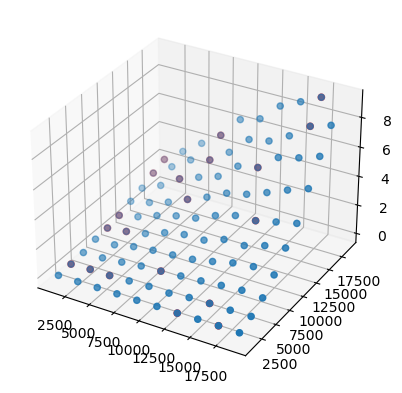

In [53]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], y)
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_test, color="red")

In [54]:
model.predict(poly.transform(np.array([50000, 50000]).reshape(1, -1)))

array([84.52385473])

Here we see that it sort of follows the trend that we expected which is nd or nk in running time. Because as in the plot, as n and d grows, the running time grows quardraticly as well. The R-squared score is also very close to 1, 0.99, which is very good. Lastly, suppose we want to predict how long it will take to run the algorithm on n=50000, d=50000 input, we get that the running time is approximately 84.52385473.